In [1]:
from preparing_data import *
import matplotlib.pyplot as plt
import os

%matplotlib inline

ZIP_PATH = os.path.join(os.getcwd(), 'data/numbers/archive.zip')
UNZIP_PATH = os.path.join(os.getcwd(), 'data/numbers/')

In [2]:
unzip_data(ZIP_PATH, UNZIP_PATH, True)

In [3]:
TRAINING_PATH = os.path.join(UNZIP_PATH, 'Train_Nums/')
TEST_PATH = os.path.join(UNZIP_PATH, 'Test_Nums/')

os.rename(TRAINING_PATH, os.path.join(UNZIP_PATH, 'Training/'))
os.rename(TEST_PATH, os.path.join(UNZIP_PATH, 'Test/'))

TEST_PATH = os.path.join(UNZIP_PATH, 'Test/')
TRAINING_PATH = os.path.join(UNZIP_PATH, 'Training/')
VALIDATION_PATH = os.path.join(UNZIP_PATH, 'Validation/')

assert os.path.isdir(TRAINING_PATH)

assert os.path.isdir(TEST_PATH)

In [4]:
split_test_val(TEST_PATH, VALIDATION_PATH, 0.7)

In [5]:
tr = data_counter(TRAINING_PATH, 'Training')
te = data_counter(TEST_PATH, 'Test')
vl = data_counter(VALIDATION_PATH, 'Validation')

Number of files in Training is 9900
Number of files in Test is 330
Number of files in Validation is 770


In [12]:
from keras.utils.image_dataset import image_dataset_from_directory

training_data = image_dataset_from_directory(directory=TRAINING_PATH,
                                            labels='inferred',
                                            label_mode='int',
                                            color_mode='rgb',
                                            shuffle=True,
                                            batch_size=64)

validation_data = image_dataset_from_directory(directory=VALIDATION_PATH,
                                               labels='inferred',
                                               label_mode='int',
                                               color_mode='rgb',
                                               shuffle=True,
                                               batch_size=64)

test_data = image_dataset_from_directory(directory=VALIDATION_PATH,
                                            labels='inferred',
                                            label_mode='int',
                                            color_mode='rgb',
                                            shuffle=True,
                                            batch_size=1)
                                        
assert training_data.class_names == validation_data.class_names == test_data.class_names

Found 9900 files belonging to 11 classes.
Found 770 files belonging to 11 classes.
Found 770 files belonging to 11 classes.


In [13]:
names = training_data.class_names
names

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'Blank']

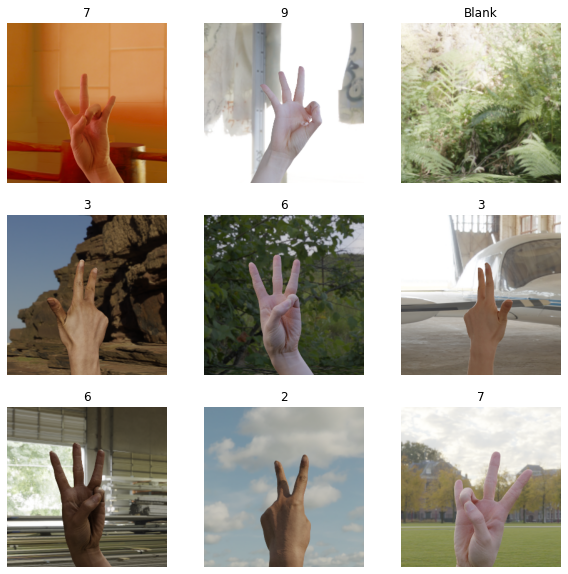

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(names[labels[i]])
    plt.axis("off")
